In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
# I'm loading the data from the CSV file using ';' as delimiter since each
# attribute is separated by ';'
data = pd.read_csv("dados_reduzidos.csv", delimiter=";")

In [ ]:
# Each sample has an ID, so i'm using this ID as the dataframe index
data.set_index("id", inplace=True)

In [ ]:
data

In [ ]:
data.sort_values(by='valor_total', inplace=True)

In [ ]:
# I'm verifying if there is any empty sample by count how many
# columns have missing values
# As we can see, 'valor_condominio' and 'qtd_dados_bairro' have some missing data
data.isna().sum()

In [ ]:
# since "qtd_dados_bairro" is the amount of propertis by neighborhood
# we can calculate it from the data, so we can drop it
data.drop('qtd_dados_bairro', inplace=True, axis=1)

In [ ]:
# Maybe valor_condominio is unavailable because properties are houses and we can make it 0
data.loc[data['valor_condominio'].isna(), ['valor_condominio']] = 0

In [ ]:
data.isna().sum()

In [ ]:
def format_float(row):
    columns = ['media_idh', 'expectativa_vida', 'renda_percapita', 'dist', 'lat', 'lon']
    for col in columns:
        row[col] = float(row[col].replace(',', '.'))
    return row

In [ ]:
# Make numeric values as float
data = data.apply(format_float, axis=1)

In [ ]:
data.dtypes

In [ ]:
# Plotting the price over the util area
plt.scatter(data["area_util"], data["valor_total"])
plt.xlabel("Util area")
plt.ylabel("Total price")

We can see that the price increases when the util area increases

In [ ]:
grouped_by_neighborhood = data.groupby(['bairro'])

In [ ]:
# Here, i'm getting the number of properties by neighborhood
properties_by_neighborhood = grouped_by_neighborhood.valor_total.count().sort_values()[-10:]

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(properties_by_neighborhood.index, properties_by_neighborhood, color='blue')
plt.title('Ten neighborhoods with most properties')
plt.ylabel('Number of properties')
plt.xlabel('Neighborhood')

In [ ]:
max_price_by_neighborhood = grouped_by_neighborhood.valor_total.max().sort_values()[-10:]

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(max_price_by_neighborhood.index, max_price_by_neighborhood)

Parelheiros has the most expensive property compared to other neighborhoods

In [ ]:
plt.scatter(data['valor_total'], data['dist'])
plt.title('Price versus distance to nearest bus stop')
plt.ylabel('Price')
plt.xlabel('Distance to nearest bus stop')

There is no clear relation between the property price and the distance to the nearest bus stop

In [ ]:
plt.scatter(data['valor_total'], data['renda_percapita'])
plt.title('Price versus renda per capita')
plt.xlabel('Price')
plt.ylabel('Renda per capita')
# There is no interesting relation between price and 'rendapercapita'

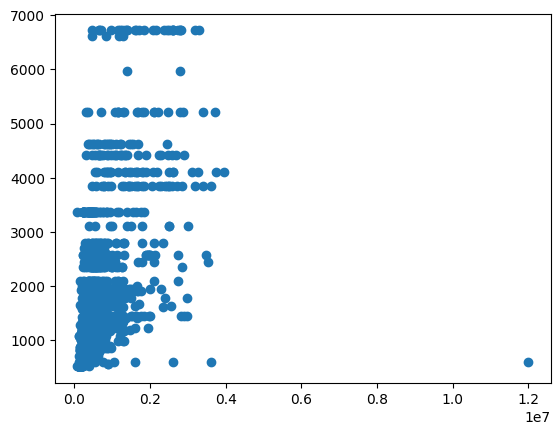

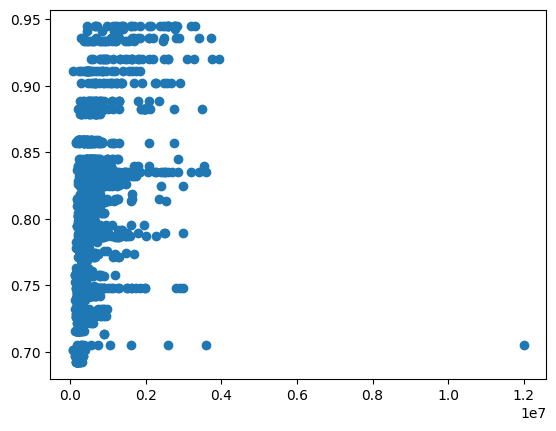

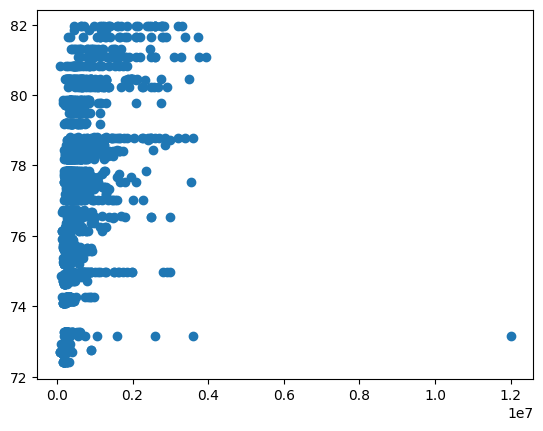

In [83]:
columns = ['renda_percapita', 'media_idh', 'expectativa_vida']
for idx, col in enumerate(columns):
    plt.figure()
    plt.scatter(data['valor_total'], data[col])

In [ ]:
columns = [
    'banheiros', 'quartos', 'suites'
]

In [ ]:
for idx, col in enumerate(columns):
    d = data.groupby(col).valor_total.min()
    plt.figure()
    plt.bar(list(map(str,d.index.values)), d)
    plt.title(col)
    plt.ylabel('Minimum property price')
    plt.xlabel("number of "+col)

In [ ]:
bool_columns = ['piscina', 'academia', 'quadra']

In [ ]:
fig, axes = plt.subplots(len(bool_columns), figsize=(20,10), layout='constrained')

In [ ]:
for idx,col in enumerate(bool_columns):
    d = data.groupby(col).valor_total.min()
    axes[idx].bar(list(map(str,d.index.values)), d)
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Price')
    axes[idx].set_xlabel(f'Has {col}')

In [ ]:
fig

From the chart above, we can see that the minimum money you must have before selecting between pool or gym is twice the value.
Maybe it's a high correlate because all these properties are in a condominium